# «Машинное обучение в бизнесе»

### Контекст
### Проект «Выбор локации для скважины»


- Описание данных
- Загрузка и подготовка данных
- Обучение и проверка модели
- Расчёт прибыли и рисков
- Вывод


Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. Также нужно проанализировать возможную прибыль и риски техникой Bootstrap.

### Описание данных


Данные геологоразведки трёх регионов находятся в файлах:

- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv


Поля в данных:

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

RANDOM_STATE = 42

# Загрузка и подготовка данных

In [33]:
data0 = pd.read_csv('geo_data_0.csv').drop('id', axis = 1)
data1 = pd.read_csv('geo_data_1.csv').drop('id', axis = 1)
data2 = pd.read_csv('geo_data_2.csv').drop('id', axis = 1)

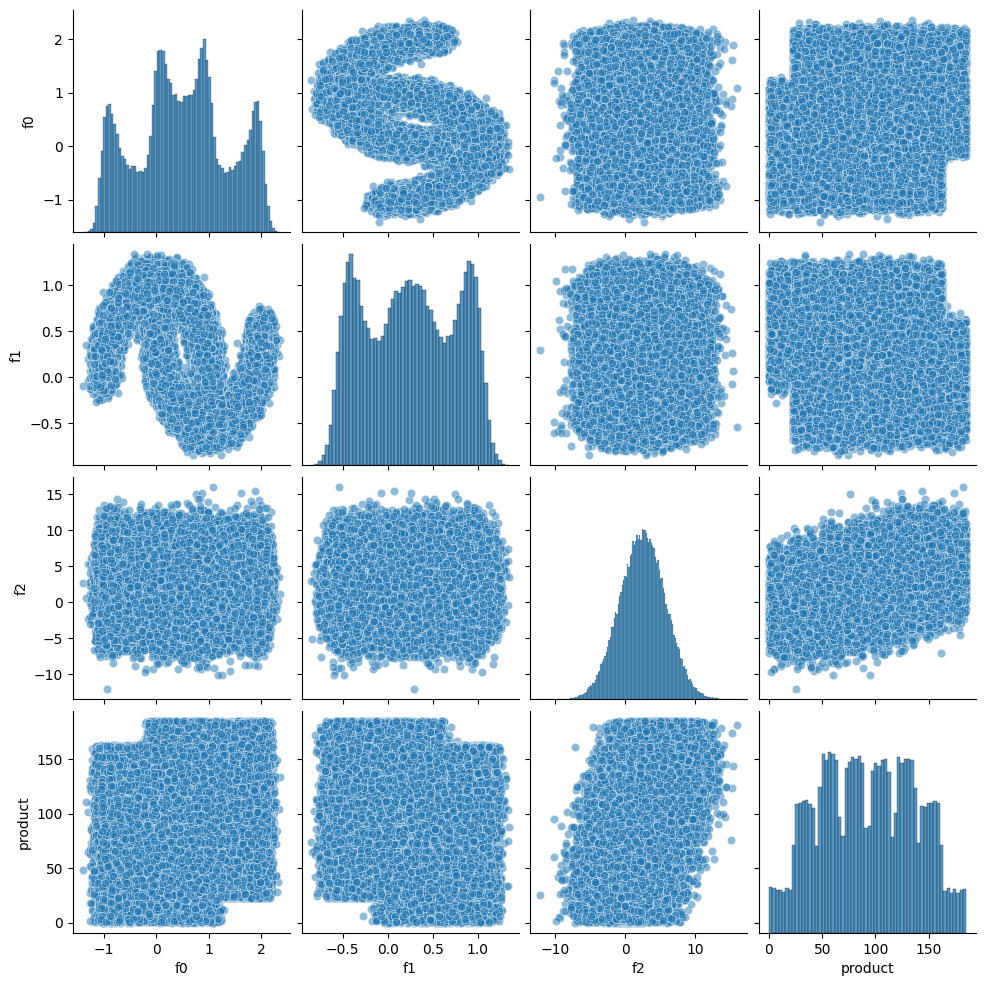

In [34]:
sns.pairplot(data = data0,
             plot_kws = {'alpha': 0.5})

In [35]:
data0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


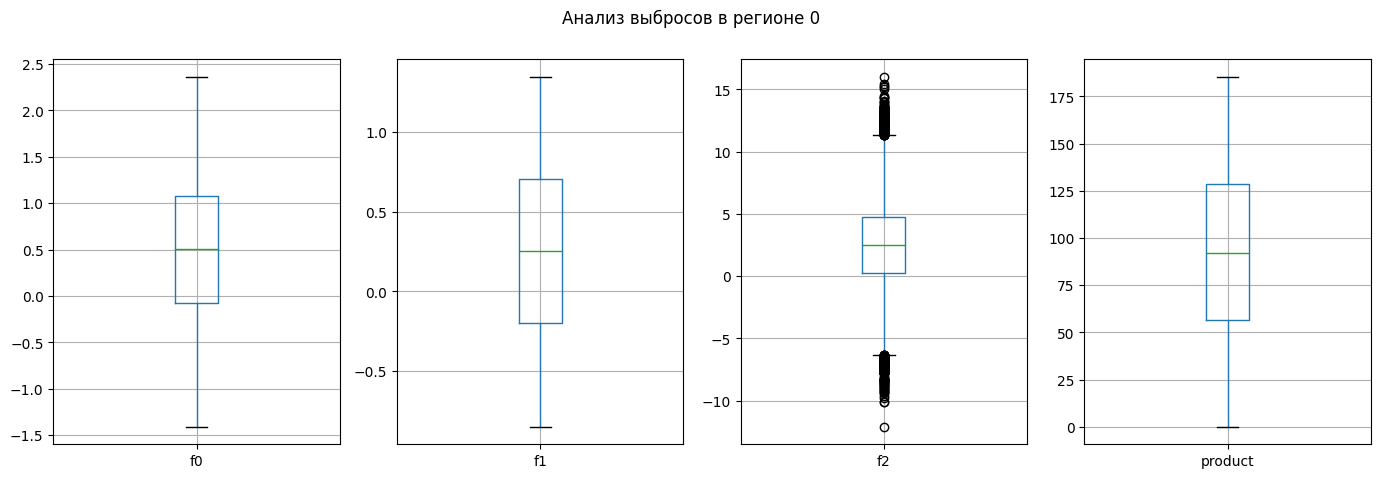

In [36]:
def boxplot(data,
            title):  

    columns = data.describe().columns  
    fig, axes = plt.subplots(1, len(columns), figsize=(17, 5))

    data.boxplot(columns[0], ax=axes[0])
    data.boxplot(columns[1], ax=axes[1])
    data.boxplot(columns[2], ax=axes[2])
    data.boxplot(columns[3], ax=axes[3])

    fig.suptitle(title)

    plt.show()




boxplot(data0, 
        'Анализ выбросов в регионе 0')

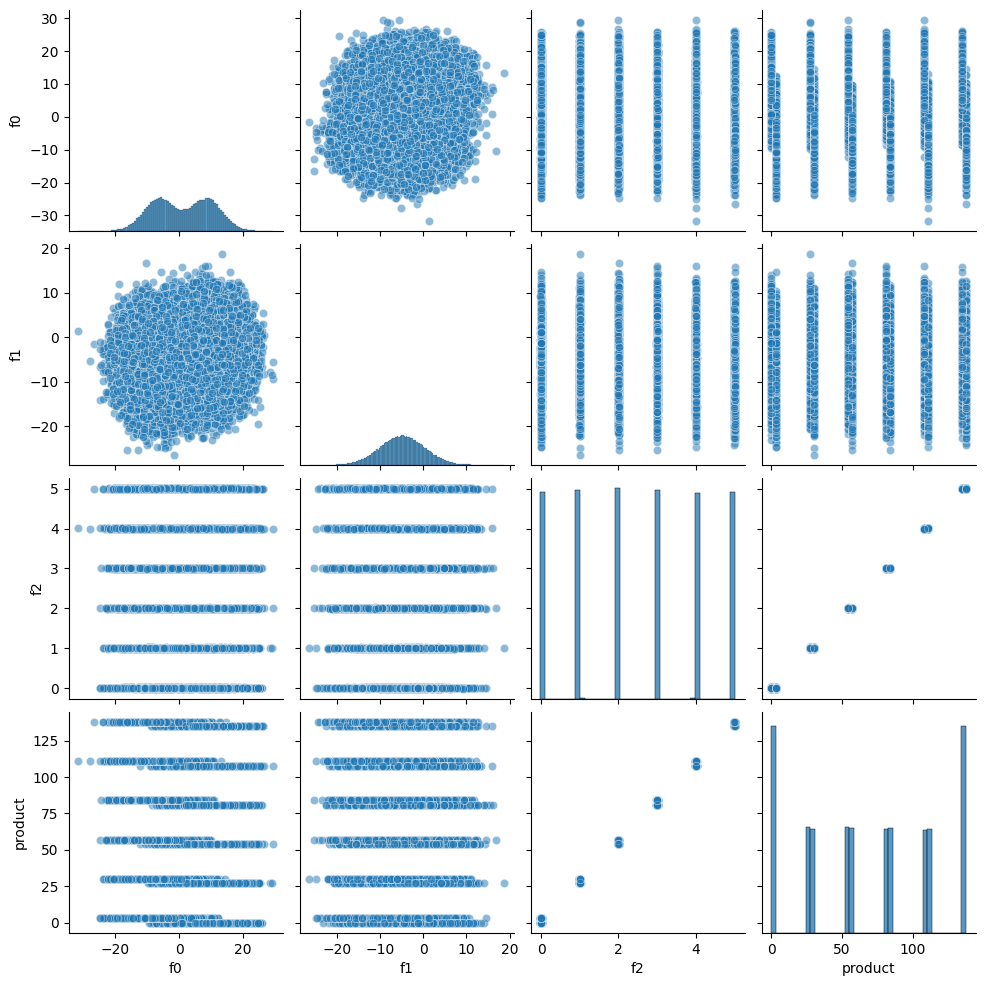

In [37]:
sns.pairplot(data = data1,
             plot_kws = {'alpha': 0.5})

In [38]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


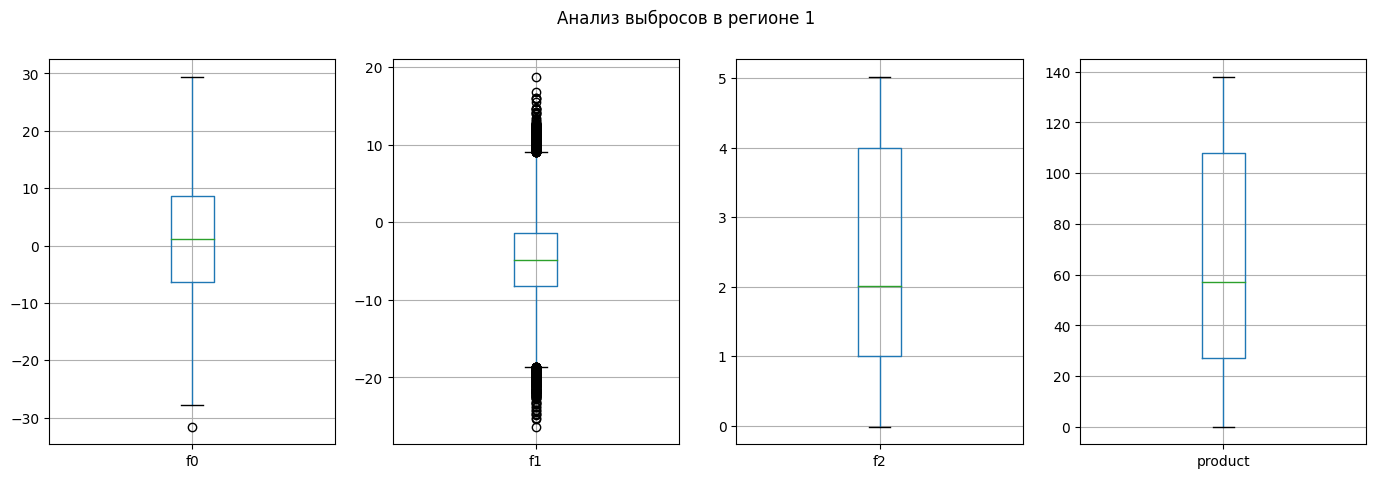

In [39]:
boxplot(data1,
        'Анализ выбросов в регионе 1')

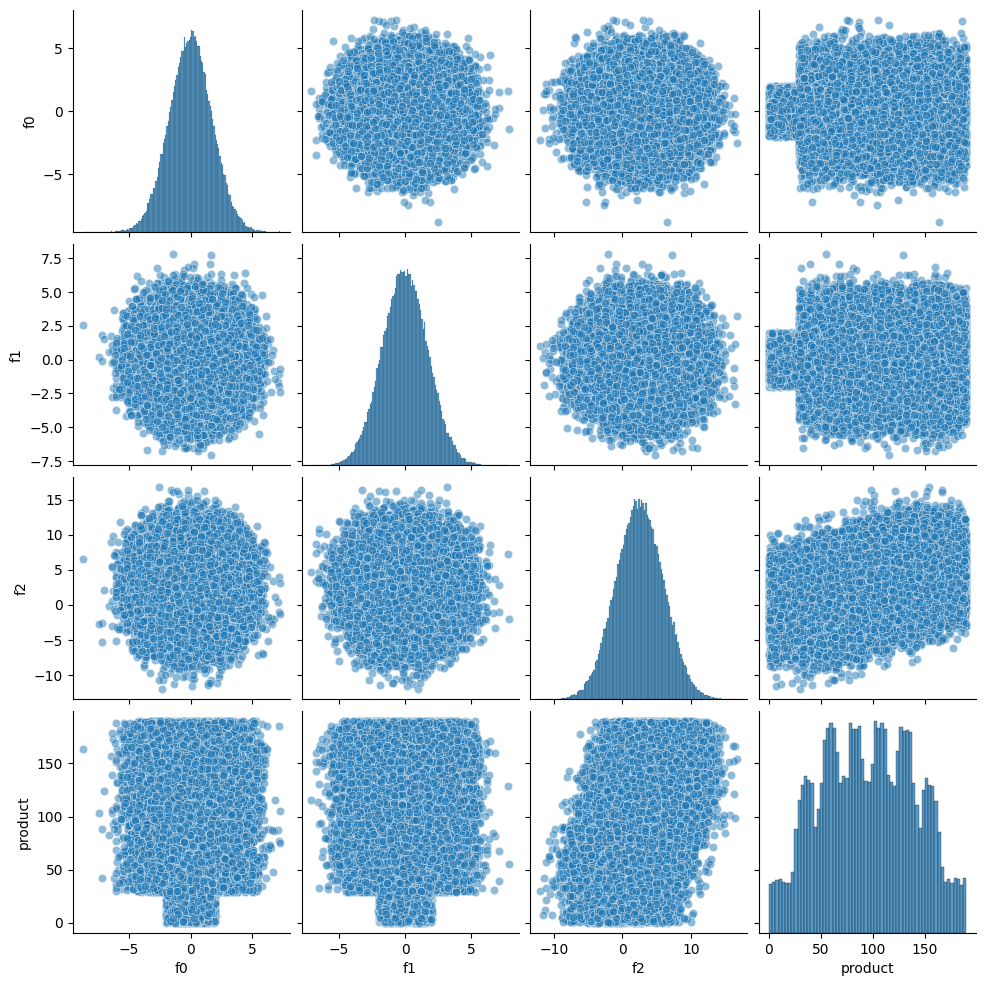

In [40]:
sns.pairplot(data = data2,
             plot_kws = {'alpha': 0.5})

In [41]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


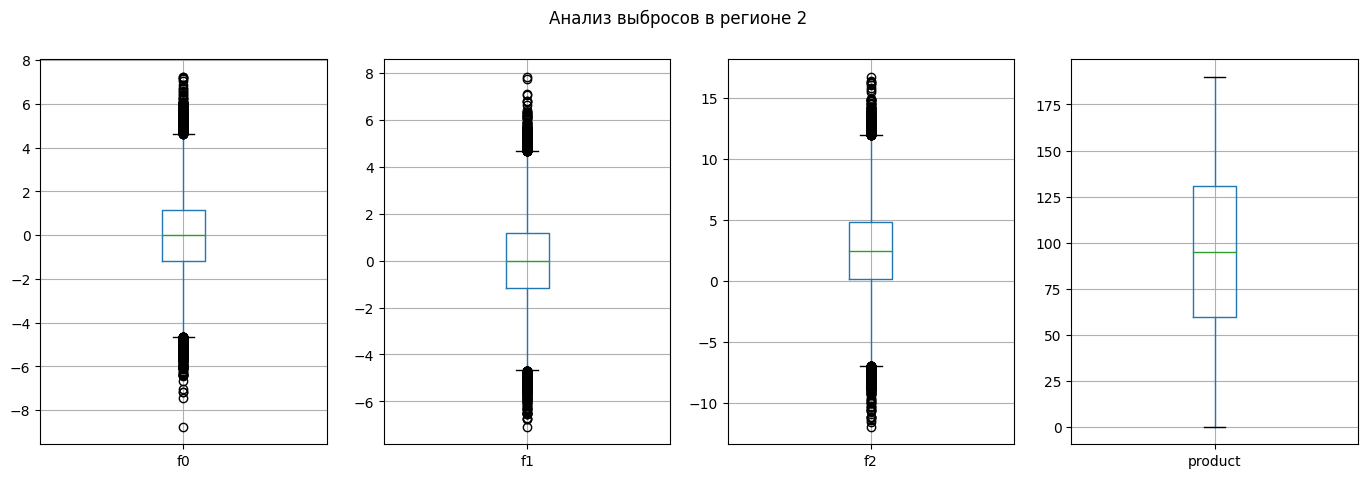

In [42]:
boxplot(data2,
        'Анализ выбросов в регионе 2')

# Обучение и проверка модели

#### Обучение и проверка модели для 0 региона

In [43]:
X_train0, X_val0, y_train0, y_val0 = train_test_split(data0.iloc[:,:-1], 
                                                      data0['product'],
                                                      test_size = 0.33,
                                                      random_state = RANDOM_STATE)

In [44]:
model_lin_reg0 = LinearRegression(n_jobs = -1)
model_lin_reg0.fit(X_train0,
                   y_train0)
 
y_pred0 = model_lin_reg0.predict(X_val0)
MSE0 = mean_squared_error(y_true = y_val0,
                          y_pred = y_pred0)

print(f'RMSE для 0 региона: {np.sqrt(MSE0)}')
print(f'Средний объем: {y_pred0.mean()}')

RMSE для 0 региона: 37.701196075359164
Средний объем: 92.44666363621434


#### Обучение и проверка модели для 1 региона

In [45]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(data1.iloc[:,:-1], 
                                                      data1['product'],
                                                      test_size = 0.33,
                                                      random_state = RANDOM_STATE)

In [46]:
model_lin_reg1 = LinearRegression(n_jobs = -1)
model_lin_reg1.fit(X_train1,
                   y_train1)
 
y_pred1 = model_lin_reg1.predict(X_val1)
MSE1 = mean_squared_error(y_true = y_val1,
                          y_pred = y_pred1)

print(f'RMSE для 1 региона: {np.sqrt(MSE1)}')
print(f'Средний объем: {y_pred1.mean()}')

RMSE для 1 региона: 0.8908007984823425
Средний объем: 68.50742252956465


#### Обучение и проверка модели для 2 региона

In [47]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(data2.iloc[:,:-1], 
                                                      data2['product'],
                                                      test_size = 0.33,
                                                      random_state = RANDOM_STATE)

In [48]:
model_lin_reg2 = LinearRegression(n_jobs = -1)
model_lin_reg2.fit(X_train2,
                   y_train2)
 
y_pred2 = model_lin_reg2.predict(X_val2)
MSE2 = mean_squared_error(y_true = y_val2,
                          y_pred = y_pred2)

print(f'RMSE для 2 региона: {np.sqrt(MSE2)}')
print(f'Средний объем: {y_pred2.mean()}')

RMSE для 2 региона: 40.11585889912508
Средний объем: 94.843602224804


### Итог по полученным предсказаниям

In [49]:
mean_0 = data0['product'].mean().__round__(1)
mean_1 = data1['product'].mean().__round__(1)
mean_2 = data2['product'].mean().__round__(1)

mean_pred_0 = y_pred0.mean().__round__(1)
mean_pred_1 = y_pred1.mean().__round__(1)
mean_pred_2 = y_pred2.mean().__round__(1)

RMSE0 = np.sqrt(MSE0).__round__(1)
RMSE1 = np.sqrt(MSE1).__round__(1)
RMSE2 = np.sqrt(MSE2).__round__(1)  

print(f'Реальное значение среднего по 0 региону: {mean_0}  Предсказанное: {mean_pred_0} Ошибка: {RMSE0}')
print(f'Реальное значение среднего по 1 региону: {mean_1}  Предсказанное: {mean_pred_1} Ошибка: {RMSE1}')
print(f'Реальное значение среднего по 2 региону: {mean_2}  Предсказанное: {mean_pred_2} Ошибка: {RMSE2}')

Реальное значение среднего по 0 региону: 92.5  Предсказанное: 92.4 Ошибка: 37.7
Реальное значение среднего по 1 региону: 68.8  Предсказанное: 68.5 Ошибка: 0.9
Реальное значение среднего по 2 региону: 95.0  Предсказанное: 94.8 Ошибка: 40.1


# Расчет прибыли и рисков

In [67]:
all_money = 10_000_000_000 # выделенный бюджет на разработку скважин
price = 450_000 # доход с единицы продукции
N = 200 # кол-во скважин на разработке


V = (all_money / N) / price # единиц продукции (тыс. баррелей) необходимо для выхода в 0
V

111.11111111111111

In [103]:
state = np.random.RandomState(RANDOM_STATE)

def profit(y_pred,  # предсказанный объем
           y_val,  # РЕАЛЬНЫЙ ОБЪЕМ 
           count):  # кол-во скважин
    
    y_pred = pd.Series(y_pred, index = y_val.index)
    y_val = pd.Series(y_val)
    sorted_y_pred = y_pred.sort_values(ascending = False)   # находим самые объемные (по предсказанию) скважины
    true_data = y_val[sorted_y_pred.index][:count] # реальные объемы
    profit = true_data.sum()*price - all_money  # подсчет прибыли со скважин
    return profit


def bootstrap(y_val,
              y_pred):
    
    bootstrap_profit = []
    for _ in range(1000):   # 1000 выборок
        bootstrap_values = pd.Series(y_val).sample(n = 500, # 1000 выборок по 500 скважин
                                                   replace = True,
                                                   random_state = state)
        y_pred_same_index = pd.Series(y_pred, index = y_val.index)[bootstrap_values.index]
        bootstrap_profit.append(profit(y_pred = y_pred_same_index,
                                       y_val = bootstrap_values,
                                       count = 200))
    profits_bootstrap = pd.Series(bootstrap_profit)
    return profits_bootstrap

In [104]:
profits0 = bootstrap(y_val = y_val0,
                     y_pred = y_pred0)

profits1 = bootstrap(y_val = y_val1,
                     y_pred = y_pred1)

profits2 = bootstrap(y_val = y_val2,
                     y_pred = y_pred2)

pd.DataFrame({'Средняя прибыль': [profits0.mean(),
                                  profits1.mean(),
                                  profits2.mean()],
              'Левая гр. ДИ': [np.quantile(profits0, 0.025),
                               np.quantile(profits1, 0.025),
                               np.quantile(profits2, 0.025)],
               'Правая гр. ДИ':[np.quantile(profits0, 0.975),
                                np.quantile(profits1, 0.975),
                                np.quantile(profits2, 0.975)]},
             index = ['регион 0',
                      'регион 1',
                      'регион 2'])  # Видим, что лишь 1-й регион дает положительную прибыль в доверительном интервале

,Средняя прибыль,Левая гр. ДИ,Правая гр. ДИ
регион 0,4.296696e+08,-8.085425e+07,9.511570e+08
регион 1,4.646124e+08,5.739269e+07,8.772518e+08
регион 2,3.877226e+08,-1.813166e+08,9.218735e+08


In [119]:
# Риск убытков

risk0 = (profits0[profits0<0].count()/ profits0.count())*100
risk1 = (profits1[profits1<0].count()/ profits1.count())*100
risk2 = (profits2[profits2<0].count()/ profits2.count())*100

pd.DataFrame({'Риск %': [risk0,
                        risk1,
                        risk2]},
              index = ['регион 0',
                       'регион 1',
                       'регион 2']) # выбор очевиден - регион 1 (меньше рисков, есинственный регион с положительный профитом по всем  выборкам)

,Риск %
регион 0,5.1
регион 1,1.5
регион 2,8.9


# Вывод

- построены модели регресси предсказывающие объем скважины
- с помощью бутстрэп подсчетов нашли среднюю прибыль по подвыборкам
- выявили самые рискованные регионы --> выбрали самый не рискованный регион --> 1-й